In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Get Data

In [2]:
constant_public = 10
constant_private = 5
public_values = [1,2,3,4,5]
private_values = [1,2,3,4,5]
colors = ['red', 'orange', 'yellow', 'green', 'blue']

In [67]:
arr = np.loadtxt("simulations/permutation.csv",
                 delimiter=",", dtype=float)
arr = np.reshape(arr, (-1, 4))
arr = arr[1:, :]
arrpk = np.loadtxt("simulations/permutation_pk.csv",
                 delimiter=",", dtype=float)
arrpk = np.reshape(arrpk, (-1, 4))
arrpk = arrpk[1:, :]
print(arr)

[[7.84447e+05 2.56295e+05 6.00000e+00 5.00000e+00]
 [1.89912e+05 2.40394e+05 6.00000e+00 5.00000e+00]
 [1.94825e+05 2.69469e+05 6.00000e+00 5.00000e+00]
 ...
 [3.09843e+05 8.31061e+05 1.00000e+01 5.00000e+00]
 [3.11982e+05 2.77141e+05 1.00000e+01 5.00000e+00]
 [3.13670e+05 6.81167e+05 1.00000e+01 5.00000e+00]]


In [ ]:
static_public = arr[np.where(arr[:, 2] == constant_public)]
static_private = arr[np.where(arr[:, 3] == constant_private)]
print(static_public)
print(static_private)

In [ ]:
for i in range(len(private_values)): 
    tempArr = static_public[np.where(static_public[:, 3] == private_values[i])]
    scatter = plt.scatter(tempArr[:,0], tempArr[:,1], c=colors[i], s = 50, label='Private length:' + str(private_values[i]))
plt.xlabel("Exchange Time (μs)", size=12)
plt.ylabel("Attack Time (μs)", size=12)
plt.title('Public key Held to Size 60', size=20)
plt.legend()
plt.show()

In [ ]:
scatter = plt.scatter(static_public[:,3], static_public[:,1], s = 50, c="black")
plt.xlabel("Private Key Length", size=12)
plt.ylabel("Attack Time (μs)", size=12)
plt.title(f'Public key Held to Size {constant_public}', size=20)
plt.legend()
plt.show()

In [80]:
bins = np.linspace(0, 1e6, 80)
for i in range(len(private_values)): 
    tempArr = static_public[np.where(static_public[:, 3] == private_values[i])]
    scatter = plt.hist(tempArr[:,1], bins, alpha=0.5, label='Private length:' + str(private_values[i]))
plt.xlabel("Attack Time (μs)", size=12)
#plt.xscale('log')
plt.ylabel("%", size=12)
plt.legend()
plt.show()

NameError: name 'static_public' is not defined

In [ ]:
df = pd.DataFrame(arr, columns=['Exchange Time (μs)', 'Attack Time (μs)', 'Public Key Length', 'Private Key Length'])
for skl in private_values:
    df2 = df[df['Private Key Length'] == skl]
    fig = sns.kdeplot(df2['Attack Time (μs)'], shade=True, label='Private length:' + str(skl))
plt.xlabel("Attack Time (μs)", size=12)
plt.ylabel("%", size=12)
plt.yscale('log')
plt.legend()
plt.show()

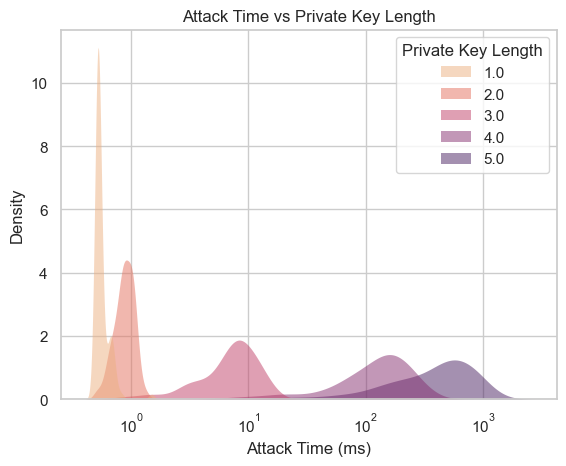

In [70]:
sns.set_theme(style="whitegrid")
df = pd.DataFrame(arrpk, columns=['Exchange Time', 'Attack Time', 'Public Key Length', 'Private Key Length'])
df['Exchange Time'] *= 1e-3
df['Attack Time'] *= 1e-3
gfg = sns.kdeplot(
   data=df, x="Attack Time", hue="Private Key Length",
   fill=True, common_norm=False, palette="flare",
   alpha=.5, linewidth=0, log_scale=True
)
gfg.set(title="Attack Time vs Private Key Length", xlabel="Attack Time (ms)")
plt.savefig("attack_time_vs_private_key_length.pdf", bbox_inches='tight')
plt.savefig("attack_time_vs_private_key_length.png", bbox_inches='tight')
plt.show()


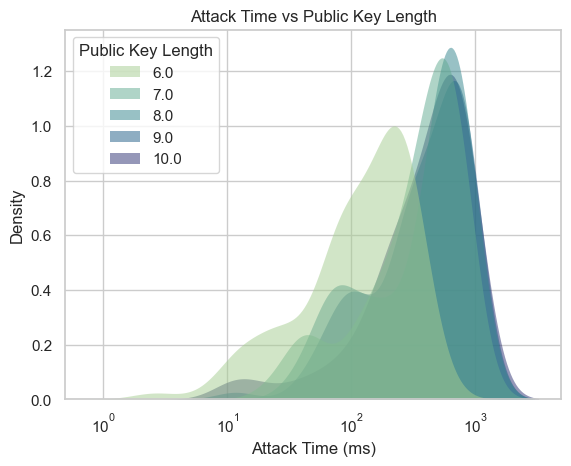

In [64]:
sns.set_theme(style="whitegrid")
df = pd.DataFrame(arr, columns=['Exchange Time', 'Attack Time', 'Public Key Length', 'Private Key Length'])
df['Exchange Time'] *= 1e-3
df['Attack Time'] *= 1e-3
gfg = sns.kdeplot(
   data=df, x="Attack Time", hue="Public Key Length",
   fill=True, common_norm=False, palette="crest",
   alpha=.5, linewidth=0, log_scale=True
)
sns.move_legend(gfg, "upper left")
gfg.set(title="Attack Time vs Public Key Length", xlabel="Attack Time (ms)")
plt.savefig("attack_time_vs_public_key_length.pdf", bbox_inches='tight')
plt.savefig("attack_time_vs_public_key_length.png", bbox_inches='tight')
plt.show()


AttributeError: 'JointGrid' object has no attribute 'axes'

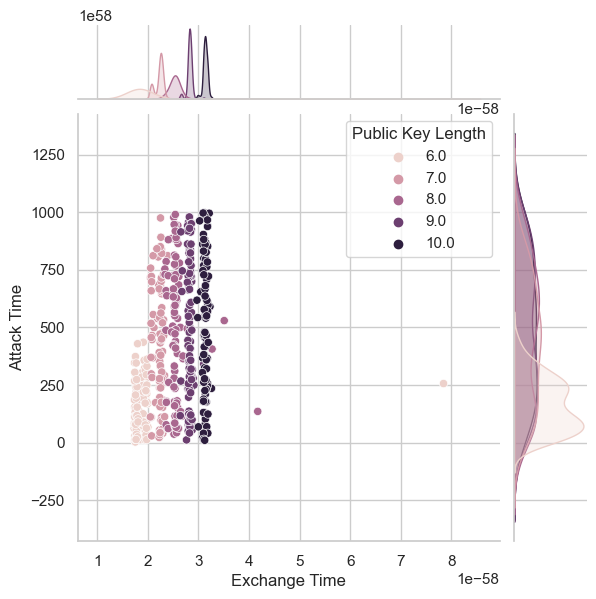

In [216]:
sns.set_theme(style="whitegrid")
df = pd.DataFrame(arr, columns=['Exchange Time', 'Attack Time', 'Public Key Length', 'Private Key Length'])
df['Exchange Time'] *= 1e-3
df['Attack Time'] *= 1e-3
df = df[df['Exchange Time'] > min(df['Exchange Time'])]
gfg = sns.jointplot(data=df, x="Exchange Time", y="Attack Time", hue="Public Key Length")
gfg.set(title="Attack vs Exchange Time across Public Key Size")
plt.show()

AttributeError: 'JointGrid' object has no attribute 'axes'

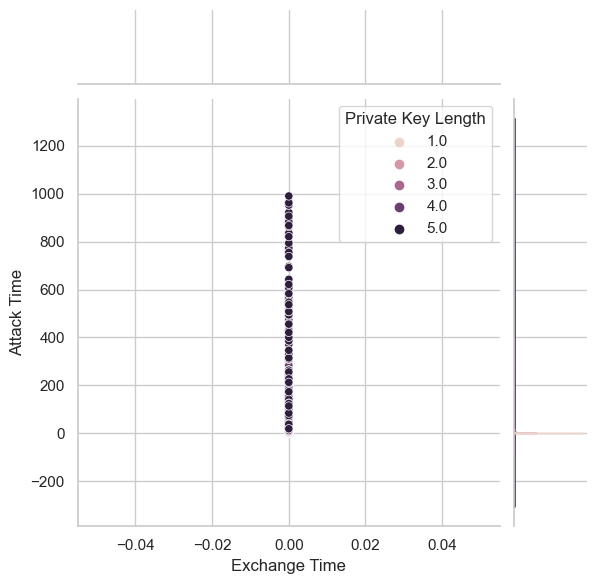

In [215]:
sns.set_theme(style="whitegrid")
df = pd.DataFrame(arrpk, columns=['Exchange Time', 'Attack Time', 'Public Key Length', 'Private Key Length'])
df['Exchange Time'] *= 1e-3
df['Attack Time'] *= 1e-3
gfg = sns.jointplot(data=df, x="Exchange Time", y="Attack Time", hue="Private Key Length")
gfg.set(title="Attack vs Exchange Time across Private Key Size")
plt.show()

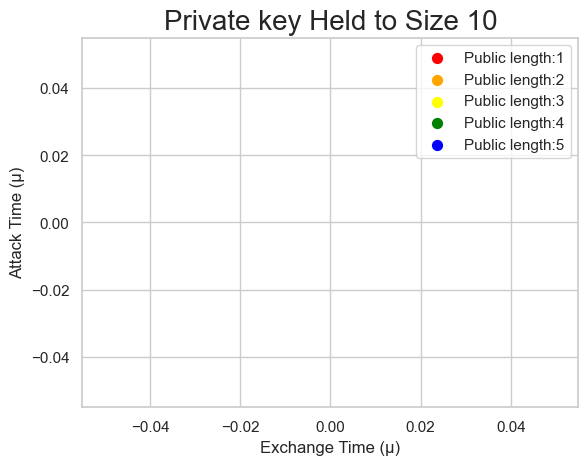

In [217]:
for i in range(5): 
    tempArr = static_private[np.where(static_private[:, 2] == public_values[i])]
    scatter = plt.scatter(tempArr[:,0], tempArr[:,1], c=colors[i], s = 50, label='Public length:' + str(public_values[i]))
plt.xlabel("Exchange Time (μ)", size=12)
plt.ylabel("Attack Time (μ)", size=12)
plt.title('Private key Held to Size 10', size=20)
plt.legend()
plt.show()

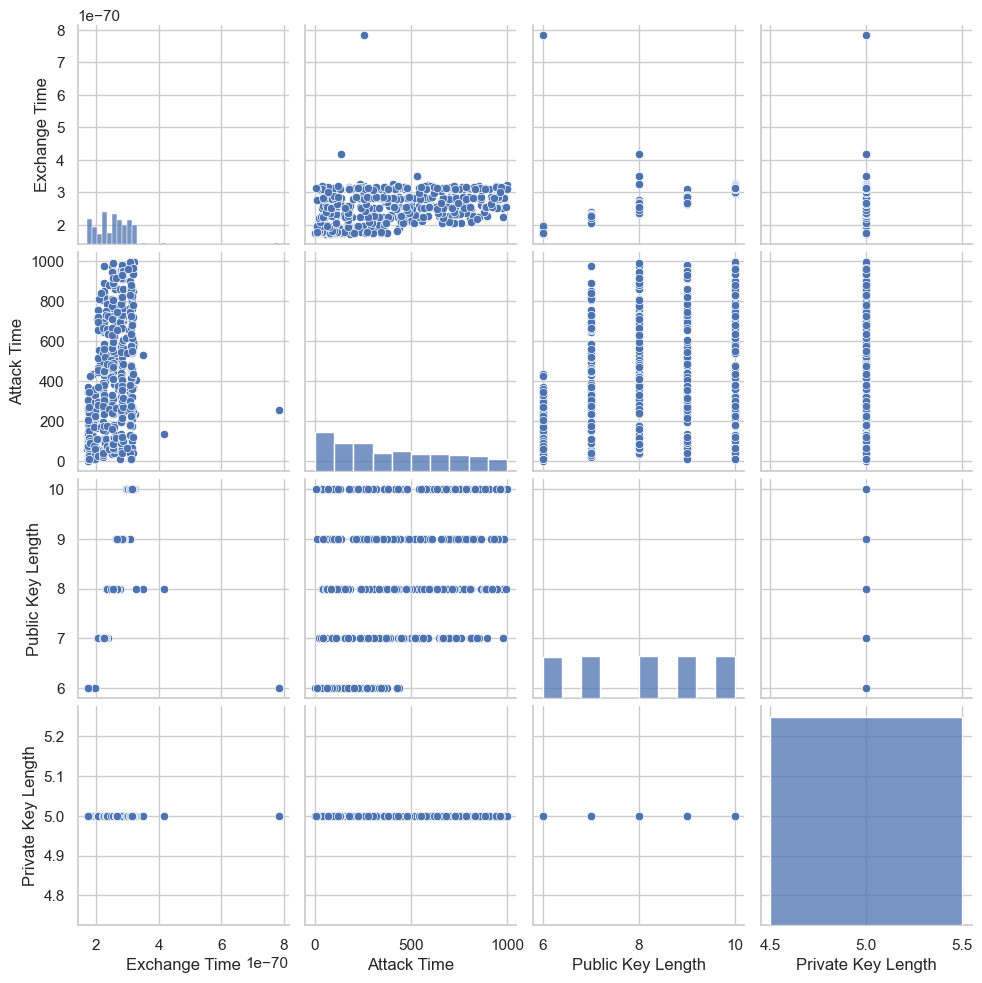

<Figure size 640x480 with 0 Axes>

In [221]:
sns.set_theme(style="whitegrid")
df = pd.DataFrame(arr, columns=['Exchange Time', 'Attack Time', 'Public Key Length', 'Private Key Length'])
df['Exchange Time'] *= 1e-3
df['Attack Time'] *= 1e-3
df = df[df['Exchange Time'] > min(df['Exchange Time'])]
gfg = sns.pairplot(data=df)
plt.show()
plt.savefig("pairplot_public_key_size.png")